In [0]:

# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [0]:
downloaded = drive.CreateFile({'id':'1IydjQ5Af_sP3mzYmTeyeVF80XXxY4bgE'}) # replace the id with id of file you want to access
downloaded.GetContentFile('supermarket_sales - Sheet1.csv')

In [0]:
import pandas as pd
xyz = pd.read_csv('supermarket_sales - Sheet1.csv') 
print(xyz.head(1))

    Invoice ID Branch    City  ... gross margin percentage gross income Rating
0  750-67-8428      A  Yangon  ...                4.761905      26.1415    9.1

[1 rows x 17 columns]


IMPORTING THE LIBRARIES

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 80)
pd.set_option('display.max_columns', 80)
pd.set_option('max_colwidth', 300)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn (*args, **kwargs):
    pass
warnings.warn = ignore_warn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


IMPORTING THE DATASET

In [0]:
DS = pd.read_csv('supermarket_sales - Sheet1.csv')
DS.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


EXPLORING THE DATA

In [0]:
DS.shape

(1000, 17)

In [0]:
DS.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [0]:
DS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [0]:

DS.drop('Branch', axis = 1, inplace = True)
DS.head()

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [0]:
DS['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

In [0]:
DS['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [0]:
DS['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

In [0]:
DS['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [0]:
DS.Date.dtype

dtype('O')

In [0]:
DS.Quantity.dtype

dtype('int64')

In [0]:
DS.Time.dtype

dtype('O')

In [0]:
DS.head()

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


VISUALIZATION ON THE DATA

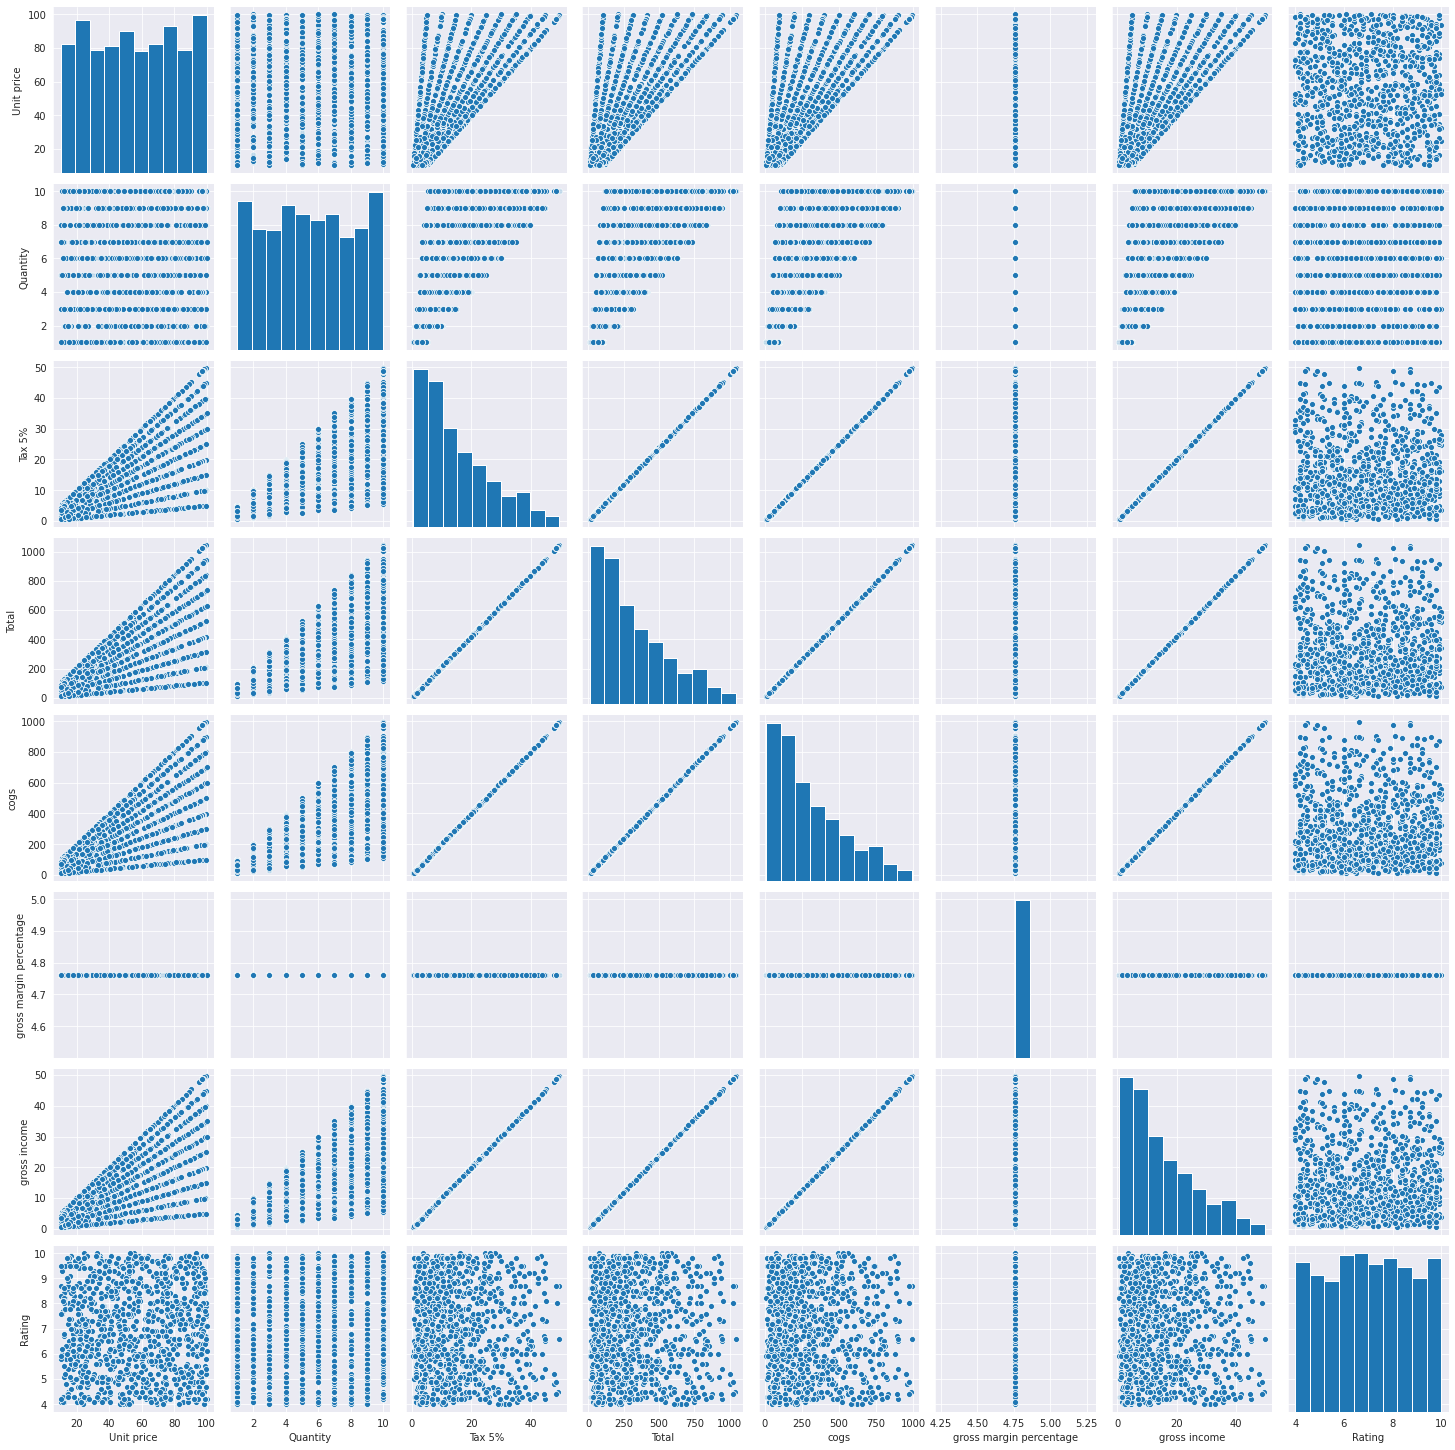

In [0]:
sns.pairplot(DS)

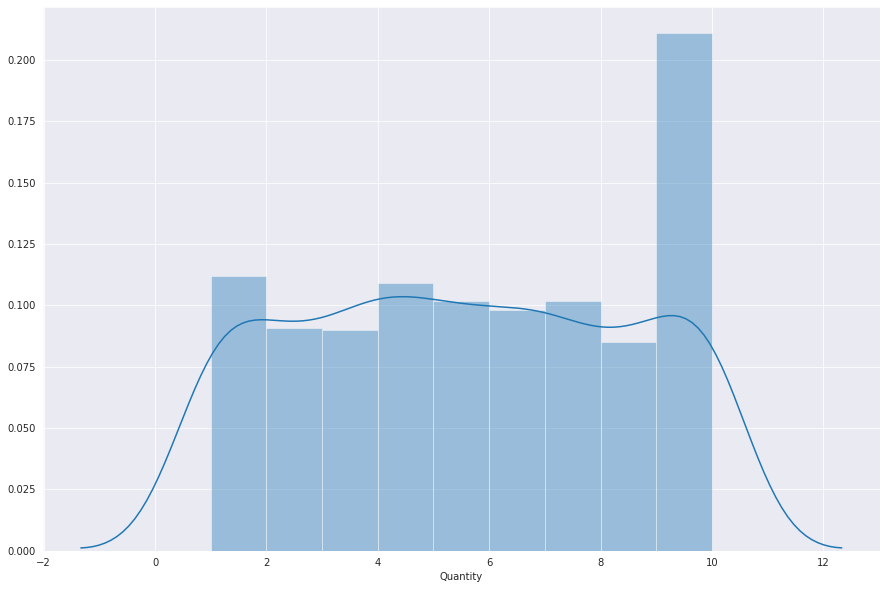

In [0]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(DS['Quantity'])

CONVERTING THE CATEGORICAL FEATURES TO NUMERICAL PARAMETERS


In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [0]:
le = LabelEncoder()
oh = OneHotEncoder()

In [0]:
y = DS.iloc[:, 6:7]
y.head()# this is the dependent variable which is what we are predicting

,Quantity
0,7
1,5
2,7
3,8
4,7


In [0]:
x = DS.drop('Quantity', axis = 1)
x.head() # This are the independent variables

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Yangon,Member,Female,Health and beauty,74.69,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Yangon,Member,Male,Health and beauty,58.22,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [0]:
x['Customer type'] = le.fit_transform(x['Customer type'])
x.head()

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Yangon,0,Female,Health and beauty,74.69,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Naypyitaw,1,Female,Electronic accessories,15.28,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Yangon,1,Male,Home and lifestyle,46.33,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Yangon,0,Male,Health and beauty,58.22,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Yangon,1,Male,Sports and travel,86.31,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [0]:
z = x[['City', 'Gender', 'Product line', 'Payment']].apply(le.fit_transform)
z.head()

,City,Gender,Product line,Payment
0,2,0,3,2
1,1,0,0,0
2,2,1,4,1
3,2,1,3,2
4,2,1,5,2


In [0]:
x.drop(['City', 'Gender', 'Product line', 'Payment'], axis = 1, inplace = True)
x.head()

,Invoice ID,Customer type,Unit price,Tax 5%,Total,Date,Time,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,0,74.69,26.1415,548.9715,1/5/2019,13:08,522.83,4.761905,26.1415,9.1
1,226-31-3081,1,15.28,3.8200,80.2200,3/8/2019,10:29,76.40,4.761905,3.8200,9.6
2,631-41-3108,1,46.33,16.2155,340.5255,3/3/2019,13:23,324.31,4.761905,16.2155,7.4
3,123-19-1176,0,58.22,23.2880,489.0480,1/27/2019,20:33,465.76,4.761905,23.2880,8.4
4,373-73-7910,1,86.31,30.2085,634.3785,2/8/2019,10:37,604.17,4.761905,30.2085,5.3


In [0]:
x = pd.concat([x, z], axis = 1)
x.head()

,Invoice ID,Customer type,Unit price,Tax 5%,Total,Date,Time,cogs,gross margin percentage,gross income,Rating,City,Gender,Product line,Payment
0,750-67-8428,0,74.69,26.1415,548.9715,1/5/2019,13:08,522.83,4.761905,26.1415,9.1,2,0,3,2
1,226-31-3081,1,15.28,3.8200,80.2200,3/8/2019,10:29,76.40,4.761905,3.8200,9.6,1,0,0,0
2,631-41-3108,1,46.33,16.2155,340.5255,3/3/2019,13:23,324.31,4.761905,16.2155,7.4,2,1,4,1
3,123-19-1176,0,58.22,23.2880,489.0480,1/27/2019,20:33,465.76,4.761905,23.2880,8.4,2,1,3,2
4,373-73-7910,1,86.31,30.2085,634.3785,2/8/2019,10:37,604.17,4.761905,30.2085,5.3,2,1,5,2


In [0]:
x['Date'] = x['Date'].str[0]
x.head()


,Invoice ID,Customer type,Unit price,Tax 5%,Total,Date,Time,cogs,gross margin percentage,gross income,Rating,City,Gender,Product line,Payment
0,750-67-8428,0,74.69,26.1415,548.9715,1,13:08,522.83,4.761905,26.1415,9.1,2,0,3,2
1,226-31-3081,1,15.28,3.8200,80.2200,3,10:29,76.40,4.761905,3.8200,9.6,1,0,0,0
2,631-41-3108,1,46.33,16.2155,340.5255,3,13:23,324.31,4.761905,16.2155,7.4,2,1,4,1
3,123-19-1176,0,58.22,23.2880,489.0480,1,20:33,465.76,4.761905,23.2880,8.4,2,1,3,2
4,373-73-7910,1,86.31,30.2085,634.3785,2,10:37,604.17,4.761905,30.2085,5.3,2,1,5,2


In [0]:
x.drop('Time', axis = 1, inplace = True)
x.head()

,Invoice ID,Customer type,Unit price,Tax 5%,Total,Date,cogs,gross margin percentage,gross income,Rating,City,Gender,Product line,Payment
0,750-67-8428,0,74.69,26.1415,548.9715,1,522.83,4.761905,26.1415,9.1,2,0,3,2
1,226-31-3081,1,15.28,3.8200,80.2200,3,76.40,4.761905,3.8200,9.6,1,0,0,0
2,631-41-3108,1,46.33,16.2155,340.5255,3,324.31,4.761905,16.2155,7.4,2,1,4,1
3,123-19-1176,0,58.22,23.2880,489.0480,1,465.76,4.761905,23.2880,8.4,2,1,3,2
4,373-73-7910,1,86.31,30.2085,634.3785,2,604.17,4.761905,30.2085,5.3,2,1,5,2


In [0]:
ID = x.iloc[:, 0:1]
ID.head()

,Invoice ID
0,750-67-8428
1,226-31-3081
2,631-41-3108
3,123-19-1176
4,373-73-7910


In [0]:
x.drop('Invoice ID', axis = 1, inplace = True)
x.head()

,Customer type,Unit price,Tax 5%,Total,Date,cogs,gross margin percentage,gross income,Rating,City,Gender,Product line,Payment
0,0,74.69,26.1415,548.9715,1,522.83,4.761905,26.1415,9.1,2,0,3,2
1,1,15.28,3.8200,80.2200,3,76.40,4.761905,3.8200,9.6,1,0,0,0
2,1,46.33,16.2155,340.5255,3,324.31,4.761905,16.2155,7.4,2,1,4,1
3,0,58.22,23.2880,489.0480,1,465.76,4.761905,23.2880,8.4,2,1,3,2
4,1,86.31,30.2085,634.3785,2,604.17,4.761905,30.2085,5.3,2,1,5,2


In [0]:
DS.columns


Index(['Invoice ID', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment',
       'cogs', 'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

In [0]:
col = ['Member', 'Normal', 'January', 'February', 'March', 'Mandalay', 'NayPyiTaw', 'Yangon', 'Female', 'Male', 'Electronic accessories', 'Fashion accessories', 'Food and beverages', 'Health and beauty', 'Home and lifestyle', 'Sports and travel', 'Cash', 'Credit card', 'Ewallet', 'Unit price', 'Tax 5%', 'Total',
       'cogs', 'gross margin percentage', 'gross income', 'Rating']

In [0]:
x = pd.DataFrame(x, columns = col)
x

,Member,Normal,January,February,March,Mandalay,NayPyiTaw,Yangon,Female,Male,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,Cash,Credit card,Ewallet,Unit price,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.69,26.1415,548.9715,522.83,4.761905,26.1415,9.1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.28,3.8200,80.2200,76.40,4.761905,3.8200,9.6
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.33,16.2155,340.5255,324.31,4.761905,16.2155,7.4
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.22,23.2880,489.0480,465.76,4.761905,23.2880,8.4
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.31,30.2085,634.3785,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.35,2.0175,42.3675,40.35,4.761905,2.0175,6.2
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.38,48.6900,1022.4900,973.80,4.761905,48.6900,4.4
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.84,1.5920,33.4320,31.84,4.761905,1.5920,7.7
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.82,3.2910,69.1110,65.82,4.761905,3.2910,4.1


In [0]:
DS.head()

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [0]:
x.head()

,Member,Normal,January,February,March,Mandalay,NayPyiTaw,Yangon,Female,Male,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,Cash,Credit card,Ewallet,Unit price,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.69,26.1415,548.9715,522.83,4.761905,26.1415,9.1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.28,3.8200,80.2200,76.40,4.761905,3.8200,9.6
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.33,16.2155,340.5255,324.31,4.761905,16.2155,7.4
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.22,23.2880,489.0480,465.76,4.761905,23.2880,8.4
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.31,30.2085,634.3785,604.17,4.761905,30.2085,5.3


In [0]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Member                   0 non-null      float64
 1   Normal                   0 non-null      float64
 2   January                  0 non-null      float64
 3   February                 0 non-null      float64
 4   March                    0 non-null      float64
 5   Mandalay                 0 non-null      float64
 6   NayPyiTaw                0 non-null      float64
 7   Yangon                   0 non-null      float64
 8   Female                   0 non-null      float64
 9   Male                     0 non-null      float64
 10  Electronic accessories   0 non-null      float64
 11  Fashion accessories      0 non-null      float64
 12  Food and beverages       0 non-null      float64
 13  Health and beauty        0 non-null      float64
 14  Home and lifestyle       

In [0]:
y.head()

,Quantity
0,7
1,5
2,7
3,8
4,7


In [0]:
x.isna().sum()

Member                     1000
Normal                     1000
January                    1000
February                   1000
March                      1000
Mandalay                   1000
NayPyiTaw                  1000
Yangon                     1000
Female                     1000
Male                       1000
Electronic accessories     1000
Fashion accessories        1000
Food and beverages         1000
Health and beauty          1000
Home and lifestyle         1000
Sports and travel          1000
Cash                       1000
Credit card                1000
Ewallet                    1000
Unit price                    0
Tax 5%                        0
Total                         0
cogs                          0
gross margin percentage       0
gross income                  0
Rating                        0
dtype: int64

In [0]:
y.isna().sum()

Quantity    0
dtype: int64

TRAINING AND SPLITTING THE DATASET

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
xtr, xts, ytr, yts = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [0]:
xtr

,Member,Normal,January,February,March,Mandalay,NayPyiTaw,Yangon,Female,Male,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,Cash,Credit card,Ewallet,Unit price,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.89,11.2005,235.2105,224.01,4.761905,11.2005,7.4
535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.67,5.8345,122.5245,116.69,4.761905,5.8345,7.4
695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.37,21.8425,458.6925,436.85,4.761905,21.8425,6.6
557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.52,49.2600,1034.4600,985.20,4.761905,49.2600,4.5
836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.54,9.6350,202.3350,192.70,4.761905,9.6350,5.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.38,8.2140,172.4940,164.28,4.761905,8.2140,7.9
270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.43,16.8575,354.0075,337.15,4.761905,16.8575,6.3
860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.27,4.3135,90.5835,86.27,4.761905,4.3135,7.0
435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.24,44.6580,937.8180,893.16,4.761905,44.6580,9.0


In [0]:
xts

,Member,Normal,January,February,March,Mandalay,NayPyiTaw,Yangon,Female,Male,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,Cash,Credit card,Ewallet,Unit price,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.17,24.9510,523.9710,499.02,4.761905,24.9510,7.3
737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.76,29.3800,616.9800,587.60,4.761905,29.3800,9.0
740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.61,19.4635,408.7335,389.27,4.761905,19.4635,8.5
660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.97,6.4455,135.3555,128.91,4.761905,6.4455,9.3
411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.87,2.1870,45.9270,43.74,4.761905,2.1870,6.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.53,11.3060,237.4260,226.12,4.761905,11.3060,5.5
332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.02,19.2550,404.3550,385.10,4.761905,19.2550,5.5
208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.37,4.5555,95.6655,91.11,4.761905,4.5555,5.1
613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.93,4.0465,84.9765,80.93,4.761905,4.0465,9.0


In [0]:
xtr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 29 to 102
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Member                   0 non-null      float64
 1   Normal                   0 non-null      float64
 2   January                  0 non-null      float64
 3   February                 0 non-null      float64
 4   March                    0 non-null      float64
 5   Mandalay                 0 non-null      float64
 6   NayPyiTaw                0 non-null      float64
 7   Yangon                   0 non-null      float64
 8   Female                   0 non-null      float64
 9   Male                     0 non-null      float64
 10  Electronic accessories   0 non-null      float64
 11  Fashion accessories      0 non-null      float64
 12  Food and beverages       0 non-null      float64
 13  Health and beauty        0 non-null      float64
 14  Home and lifestyle       

In [0]:
xtr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 29 to 102
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Member                   0 non-null      float64
 1   Normal                   0 non-null      float64
 2   January                  0 non-null      float64
 3   February                 0 non-null      float64
 4   March                    0 non-null      float64
 5   Mandalay                 0 non-null      float64
 6   NayPyiTaw                0 non-null      float64
 7   Yangon                   0 non-null      float64
 8   Female                   0 non-null      float64
 9   Male                     0 non-null      float64
 10  Electronic accessories   0 non-null      float64
 11  Fashion accessories      0 non-null      float64
 12  Food and beverages       0 non-null      float64
 13  Health and beauty        0 non-null      float64
 14  Home and lifestyle       

In [0]:
ytr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 29 to 102
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Quantity  800 non-null    int64
dtypes: int64(1)
memory usage: 12.5 KB


In [0]:
yts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 521 to 78
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Quantity  200 non-null    int64
dtypes: int64(1)
memory usage: 3.1 KB


In [0]:
yts

,Quantity
521,6
737,10
740,7
660,3
411,2
...,...
408,4
332,5
208,3
613,1


APPLICATION OF THE REGRESSION MODELS
LINEAR REGRESSION MODEL

In [0]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [0]:
lr = LinearRegression()

In [0]:
lr.fit(xtr, ytr)

ValueError: ignored

In [0]:
x.columns

Index(['Member', 'Normal', 'January', 'February', 'March', 'Mandalay',
       'NayPyiTaw', 'Yangon', 'Female', 'Male', 'Electronic accessories',
       'Fashion accessories', 'Food and beverages', 'Health and beauty',
       'Home and lifestyle', 'Sports and travel', 'Cash', 'Credit card',
       'Ewallet', 'Unit price', 'Tax 5%', 'Total', 'cogs',
       'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

In [0]:
predictors = x[['Unit price', 'Tax 5%', 'Total', 'cogs',
       'gross margin percentage', 'gross income', 'Rating']]
predictors.head()

,Unit price,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
0,74.69,26.1415,548.9715,522.83,4.761905,26.1415,9.1
1,15.28,3.8200,80.2200,76.40,4.761905,3.8200,9.6
2,46.33,16.2155,340.5255,324.31,4.761905,16.2155,7.4
3,58.22,23.2880,489.0480,465.76,4.761905,23.2880,8.4
4,86.31,30.2085,634.3785,604.17,4.761905,30.2085,5.3


In [0]:
coef = lr.coef_
coef = pd.DataFrame(coef)
coef

AttributeError: ignored

In [0]:
coeff_df = pd.DataFrame(lr.coef_, index = ['Coefficient'], columns = x.columns)  
coeff_df

AttributeError: ignored

In [0]:
coefficients = coeff_df.values.reshape(-1, 1)
coefficients = pd.DataFrame(coefficients, x.columns, columns = ['Coefficient'])
coefficients

NameError: ignored

In [0]:
yp = lr.predict(xts)

NotFittedError: ignored

In [0]:
yp = pd.DataFrame(yp, columns=['Predicted'])
yp

NameError: ignored

In [0]:
yts

,Quantity
521,6
737,10
740,7
660,3
411,2
...,...
408,4
332,5
208,3
613,1


In [0]:
yts.columns

Index(['Quantity'], dtype='object')

In [0]:
predictors.iterrows()

<generator object DataFrame.iterrows at 0x7fe946a6cfc0>

In [0]:
predictors.head()


,Unit price,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
0,74.69,26.1415,548.9715,522.83,4.761905,26.1415,9.1
1,15.28,3.8200,80.2200,76.40,4.761905,3.8200,9.6
2,46.33,16.2155,340.5255,324.31,4.761905,16.2155,7.4
3,58.22,23.2880,489.0480,465.76,4.761905,23.2880,8.4
4,86.31,30.2085,634.3785,604.17,4.761905,30.2085,5.3


In [0]:
n = yts
n.head()


,Quantity
521,6
737,10
740,7
660,3
411,2


In [0]:
n.reset_index(inplace = True)

In [0]:
n.head()

,index,Quantity
0,521,6
1,737,10
2,740,7
3,660,3
4,411,2


In [0]:
m = n['index']
m = np.array(m)
m

array([521, 737, 740, 660, 411, 678, 626, 513, 859, 136, 811,  76, 636,
       973, 938, 899, 280, 883, 761, 319, 549, 174, 371, 527, 210, 235,
       101, 986, 902, 947, 346, 139, 621, 499, 370, 198, 687, 584, 901,
        59, 328,  96, 312, 974, 299, 277, 924, 601, 439, 837, 570, 879,
       261, 578,  23,  30, 617,  10, 221, 820, 296,  54, 542, 209, 604,
       692, 662, 866,  70, 543, 107, 493, 590, 741, 292, 289, 652,  39,
       589, 307, 679,  66, 275,  67, 318, 548, 998, 714, 753, 327, 382,
       451, 522, 218, 787, 436, 764,  88,  63, 826, 716, 351, 936, 256,
       635, 644, 554, 959, 168, 917, 528, 823, 985, 816,  86, 432, 184,
       978, 534, 294, 892, 425, 713, 260, 237, 559, 583, 445, 867, 800,
       599, 849, 265, 995, 529,  55, 120, 215,  25,  72,  44, 247, 721,
       281, 893, 914, 810, 244, 822, 321, 643, 158, 977, 429, 941, 462,
       309, 697,  60, 884, 595, 767, 649, 650, 865, 668, 298, 689, 314,
       310, 361, 479, 110, 989, 486, 363, 254, 259, 802, 677, 49

In [0]:
yts.head()

,index,Quantity
0,521,6
1,737,10
2,740,7
3,660,3
4,411,2


In [0]:
yp.head()

NameError: ignored

In [0]:
yts.set_index('index', inplace = True)
yts.head()

,Quantity
index,
521,6
737,10
740,7
660,3
411,2


In [0]:
from sklearn import metrics

In [0]:
from sklearn.metrics import r2_score

MULTIPLE LINEAR REGRESSION PERFORMANCE

In [0]:
LRscore = r2_score(yts, yp)
LRscore

NameError: ignored

In [0]:
print('Mean Absolute Error:', metrics.mean_absolute_error(yts, yp))  
print('Mean Squared Error:', metrics.mean_squared_error(yts, yp))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yts, yp)))

NameError: ignored

DATA PREPROCESSING
SCALING OF THE NUMERICAL PARAMETERS

/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:765: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


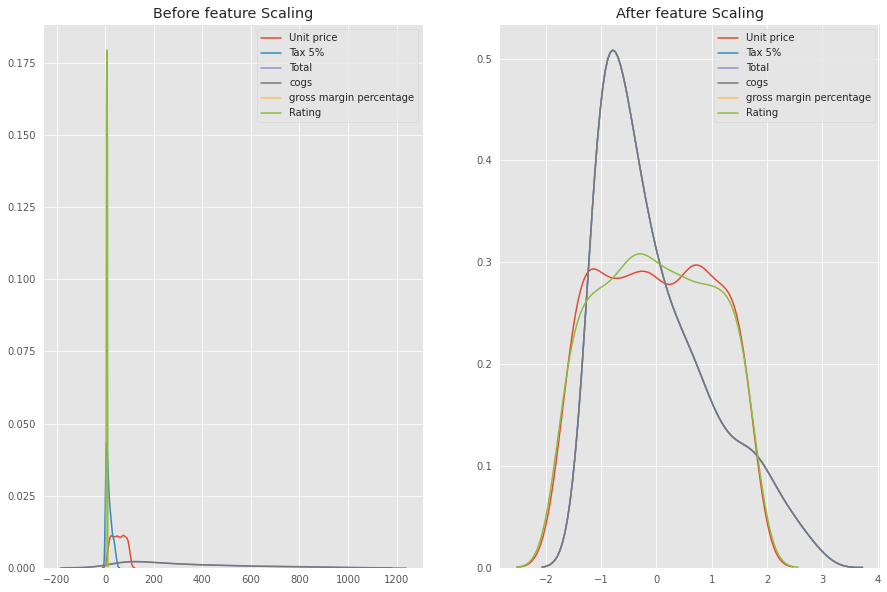

In [0]:
from sklearn import preprocessing
import matplotlib
matplotlib.style.use('ggplot')

scaler = preprocessing.StandardScaler()
scaled_x = scaler.fit_transform(x)
scaled_x = pd.DataFrame(scaled_x, columns = col)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 10))
ax1.set_title('Before feature Scaling')
sns.kdeplot(x['Unit price'], ax=ax1)
sns.kdeplot(x['Tax 5%'], ax=ax1)
sns.kdeplot(x['Total'], ax=ax1)
sns.kdeplot(x['cogs'], ax=ax1)
sns.kdeplot(x['gross margin percentage'], ax=ax1)
sns.kdeplot(x['Rating'], ax=ax1)
ax2.set_title('After feature Scaling')
sns.kdeplot(scaled_x['Unit price'], ax=ax2)
sns.kdeplot(scaled_x['Tax 5%'], ax=ax2)
sns.kdeplot(scaled_x['Total'], ax=ax2)
sns.kdeplot(scaled_x['cogs'], ax=ax2)
sns.kdeplot(scaled_x['gross margin percentage'], ax=ax2)
sns.kdeplot(scaled_x['Rating'], ax=ax2)
plt.show()


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


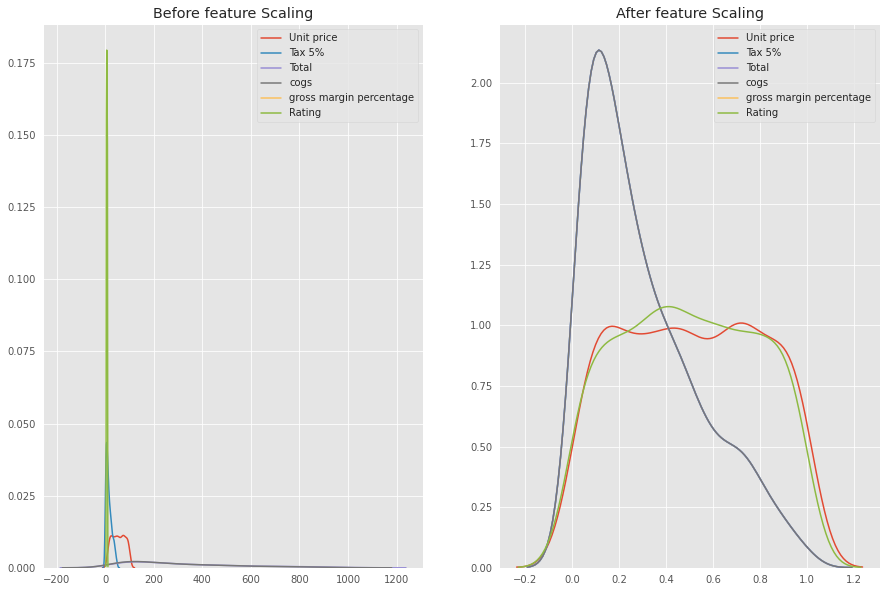

In [0]:
from sklearn import preprocessing
import matplotlib
matplotlib.style.use('ggplot')

scaler = preprocessing.MinMaxScaler()
scaled_x = scaler.fit_transform(x)
scaled_x = pd.DataFrame(scaled_x, columns = col)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 10))
ax1.set_title('Before feature Scaling')
sns.kdeplot(x['Unit price'], ax=ax1)
sns.kdeplot(x['Tax 5%'], ax=ax1)
sns.kdeplot(x['Total'], ax=ax1)
sns.kdeplot(x['cogs'], ax=ax1)
sns.kdeplot(x['gross margin percentage'], ax=ax1)
sns.kdeplot(x['Rating'], ax=ax1)
ax2.set_title('After feature Scaling')
sns.kdeplot(scaled_x['Unit price'], ax=ax2)
sns.kdeplot(scaled_x['Tax 5%'], ax=ax2)
sns.kdeplot(scaled_x['Total'], ax=ax2)
sns.kdeplot(scaled_x['cogs'], ax=ax2)
sns.kdeplot(scaled_x['gross margin percentage'], ax=ax2)
sns.kdeplot(scaled_x['Rating'], ax=ax2)
plt.show()


In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
xs = StandardScaler()

In [0]:
x_tr = xs.fit_transform(xtr)
x_ts = xs.fit_transform(xts)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:765: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:765: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count


DECISION TREE REGRESSOR MODEL

In [0]:
from sklearn.tree import DecisionTreeRegressor

In [0]:
dt = DecisionTreeRegressor()

In [0]:
from sklearn.svm import SVR

In [0]:
sv = SVR(kernel = 'rbf')

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
rf = RandomForestRegressor()

In [0]:
yts.head()

,Quantity
index,
521,6
737,10
740,7
660,3
411,2


In [0]:
yts.reset_index(inplace = True)
yts.head()

,index,Quantity
0,521,6
1,737,10
2,740,7
3,660,3
4,411,2
